Importing The Dataset From Kaggle

In [32]:
!pip install kaggle

In [33]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [36]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing The Dependencies

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Getting Intuition About Data & Preprocessing

In [38]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_2563.jpg', 'with_mask_212.jpg', 'with_mask_459.jpg', 'with_mask_714.jpg', 'with_mask_1698.jpg']
['with_mask_1487.jpg', 'with_mask_1416.jpg', 'with_mask_361.jpg', 'with_mask_1875.jpg', 'with_mask_1666.jpg']


In [39]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_3391.jpg', 'without_mask_2040.jpg', 'without_mask_2385.jpg', 'without_mask_572.jpg', 'without_mask_2182.jpg']
['without_mask_3174.jpg', 'without_mask_1458.jpg', 'without_mask_1822.jpg', 'without_mask_3761.jpg', 'without_mask_3493.jpg']


In [40]:
print(len(with_mask_files))

3725


In [41]:
print(len(without_mask_files))

3828


In [42]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [43]:
print(with_mask_labels[:7])
print(without_mask_labels[:7])

[1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0]


In [44]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

print(type(labels))

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
<class 'list'>


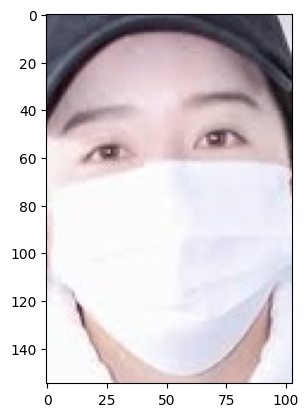

In [45]:
img = mpimg.imread('/content/data/with_mask/with_mask_50.jpg')
imgplot = plt.imshow(img)
plt.show()

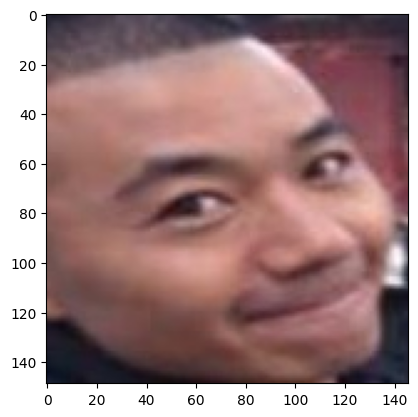

In [46]:
img = mpimg.imread('/content/data/without_mask/without_mask_18.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [47]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [48]:
print(type(data[0]),"  ", len(data))

<class 'numpy.ndarray'>    7553


array([[[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       [[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       [[186, 180, 164],
        [186, 180, 164],
        [186, 180, 164],
        ...,
        [202, 196, 180],
        [202, 196, 180],
        [201, 195, 179]],

       ...,

       [[ 86,  86,  78],
        [ 81,  81,  73],
        [ 74,  74,  66],
        ...,
        [221, 220, 216],
        [221, 220, 216],
        [220, 219, 215]],

       [[ 72,  72,  64],
        [ 78,  78,  70],
        [ 83,  83,  75],
        ...,
        [220, 219, 215],
        [220, 219, 215],
        [219, 218, 214]],

       [[ 77,  77,  69],
        [ 87,  87,  79],
        [ 99,  99,  91],
        ...,
        [220, 219, 215],
        [219, 218, 214],
        [219, 218, 214]]], dtype=uint8)
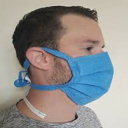

In [49]:
data[0]

In [50]:
X = np.array(data)
y = np.array(labels)

In [51]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [52]:
X.shape, y.shape

((7553, 128, 128, 3), (7553,))

Training & Splitting Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [55]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [56]:
X_train_scaled[5]

array([[[0.15294118, 0.30588235, 0.33333333],
        [0.15294118, 0.30196078, 0.33333333],
        [0.14901961, 0.30588235, 0.33333333],
        ...,
        [0.12156863, 0.14901961, 0.08235294],
        [0.12156863, 0.15294118, 0.0745098 ],
        [0.12941176, 0.16078431, 0.07058824]],

       [[0.14117647, 0.30980392, 0.34509804],
        [0.14117647, 0.30980392, 0.34117647],
        [0.1372549 , 0.30588235, 0.3372549 ],
        ...,
        [0.12156863, 0.14901961, 0.07843137],
        [0.11372549, 0.14117647, 0.07058824],
        [0.11764706, 0.14509804, 0.08235294]],

       [[0.12941176, 0.31372549, 0.35294118],
        [0.13333333, 0.31372549, 0.35294118],
        [0.13333333, 0.30588235, 0.34509804],
        ...,
        [0.12156863, 0.15294118, 0.08235294],
        [0.10980392, 0.1372549 , 0.07058824],
        [0.10980392, 0.14117647, 0.08235294]],

       ...,

       [[0.16862745, 0.31372549, 0.81960784],
        [0.12941176, 0.25490196, 0.75686275],
        [0.12941176, 0

Building CNN

In [57]:
import tensorflow as tf
from tensorflow import keras

In [58]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation = 'sigmoid'))

In [59]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [60]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - acc: 0.7059 - loss: 0.7104 - val_acc: 0.8793 - val_loss: 0.2759
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8757 - loss: 0.3116 - val_acc: 0.8876 - val_loss: 0.2811
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8973 - loss: 0.2524 - val_acc: 0.9140 - val_loss: 0.2043
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9166 - loss: 0.2116 - val_acc: 0.9256 - val_loss: 0.2059
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9329 - loss: 0.1785 - val_acc: 0.9240 - val_loss: 0.2132


In [61]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test acc : ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9242 - loss: 0.2031
Test acc :  0.929847776889801


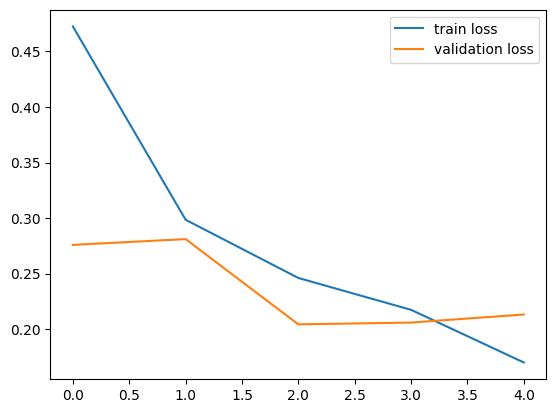

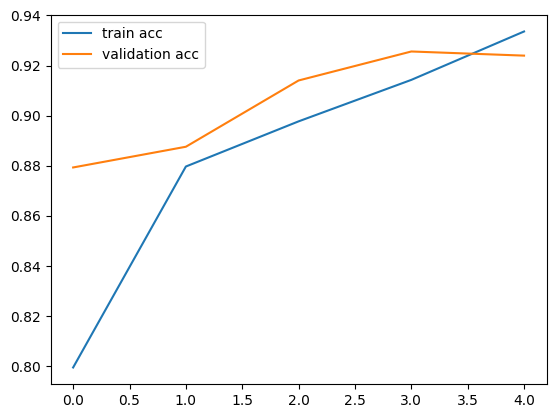

In [62]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['val_acc'], label = 'validation acc')
plt.legend()
plt.show()

Enter the path of the image to be tested : /content/wear.jpg


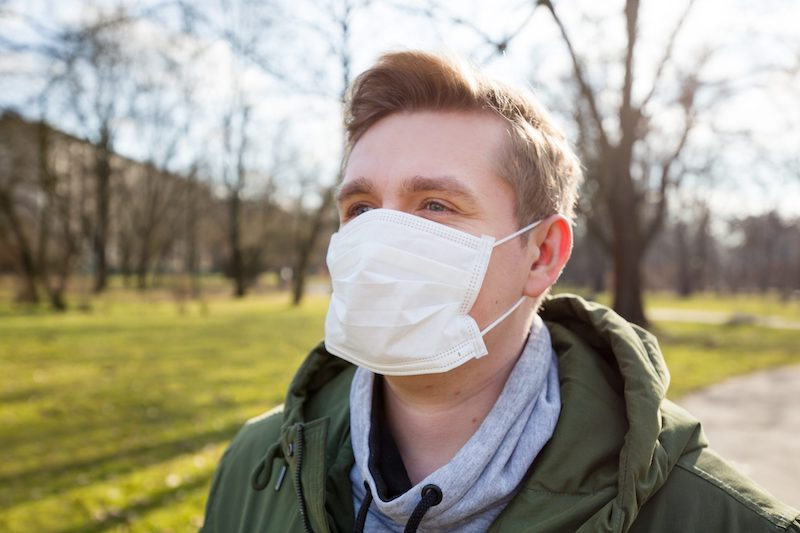

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.32772437 0.79610705]]
1
The person in the image is wearing a mask


In [68]:
input_image_path = input('Enter the path of the image to be tested : ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')